In [1]:
# Importing the libraries 

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

# Ignore harmless warnings 

import warnings 
warnings.filterwarnings("ignore")

# Set to display all the columns in dataset

pd.set_option("display.max_columns", None)

# Import psql to run queries 

import pandasql as psql

In [2]:
#load the train data
data = pd.read_csv(r"C:\Users\mouni\OneDrive\Desktop\aiml\train.csv",header=0)

# Copy the file to back-up

data_bk = data.copy()

# Display first 5 records

data.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,satisfied


In [3]:
data.shape

(103904, 25)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Customer Type                      103904 non-null  object 
 4   Age                                103904 non-null  int64  
 5   Type of Travel                     103904 non-null  object 
 6   Class                              103904 non-null  object 
 7   Flight Distance                    103904 non-null  int64  
 8   Inflight wifi service              103904 non-null  int64  
 9   Departure/Arrival time convenient  103904 non-null  int64  
 10  Ease of Online booking             103904 non-null  int64  
 11  Gate location                      1039

In [5]:
data.isnull().sum()

Unnamed: 0                             0
id                                     0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction    

In [6]:
data['Arrival Delay in Minutes'].count()

103594

In [7]:
from sklearn.impute import SimpleImputer
imputer_str=SimpleImputer(missing_values=np.nan,strategy='most_frequent',fill_value=None,verbose=0,copy=True,add_indicator=False)
data['Arrival Delay in Minutes']=imputer_str.fit_transform(data[['Arrival Delay in Minutes']])


In [8]:
data.isnull().sum()

Unnamed: 0                           0
id                                   0
Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
satisfaction                         0
dtype: int64

In [9]:
#load the test data
data_test= pd.read_csv(r"C:\Users\mouni\OneDrive\Desktop\aiml\test.csv",header=0)

# Copy the file to back-up

data1_bk = data_test.copy()

# Display first 5 records

data_test.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,3,4,3,4,3,5,5,5,5,2,5,5,50,44.0,satisfied
1,1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,3,1,5,4,5,4,4,4,4,3,4,5,0,0.0,satisfied
2,2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,2,4,2,2,2,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,3,77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,0,2,3,4,4,1,1,1,1,3,1,4,0,6.0,satisfied
4,4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,4,3,4,1,2,2,2,2,2,4,2,4,0,20.0,satisfied


In [10]:
data_test.shape

(25976, 25)

In [11]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25976 entries, 0 to 25975
Data columns (total 25 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Unnamed: 0                         25976 non-null  int64  
 1   id                                 25976 non-null  int64  
 2   Gender                             25976 non-null  object 
 3   Customer Type                      25976 non-null  object 
 4   Age                                25976 non-null  int64  
 5   Type of Travel                     25976 non-null  object 
 6   Class                              25976 non-null  object 
 7   Flight Distance                    25976 non-null  int64  
 8   Inflight wifi service              25976 non-null  int64  
 9   Departure/Arrival time convenient  25976 non-null  int64  
 10  Ease of Online booking             25976 non-null  int64  
 11  Gate location                      25976 non-null  int

In [12]:
data_test.isnull().sum()

Unnamed: 0                            0
id                                    0
Gender                                0
Customer Type                         0
Age                                   0
Type of Travel                        0
Class                                 0
Flight Distance                       0
Inflight wifi service                 0
Departure/Arrival time convenient     0
Ease of Online booking                0
Gate location                         0
Food and drink                        0
Online boarding                       0
Seat comfort                          0
Inflight entertainment                0
On-board service                      0
Leg room service                      0
Baggage handling                      0
Checkin service                       0
Inflight service                      0
Cleanliness                           0
Departure Delay in Minutes            0
Arrival Delay in Minutes             83
satisfaction                          0


In [13]:
data_test['Arrival Delay in Minutes'].count()

25893

In [14]:
from sklearn.impute import SimpleImputer
imputer_str=SimpleImputer(missing_values=np.nan,strategy='most_frequent',fill_value=None,verbose=0,copy=True,add_indicator=False)
data_test['Arrival Delay in Minutes']=imputer_str.fit_transform(data_test[['Arrival Delay in Minutes']])


In [15]:
data_test.isnull().sum()

Unnamed: 0                           0
id                                   0
Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
satisfaction                         0
dtype: int64

In [16]:
#use labelencoder to handle categorical data
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data['Gender']=le.fit_transform(data[['Gender']])
data['Customer Type']=le.fit_transform(data[['Customer Type']])
data['Type of Travel']=le.fit_transform(data[['Type of Travel']])
data['Class']=le.fit_transform(data[['Class']])
data['satisfaction']=le.fit_transform(data[['satisfaction']])



In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  int32  
 3   Customer Type                      103904 non-null  int32  
 4   Age                                103904 non-null  int64  
 5   Type of Travel                     103904 non-null  int32  
 6   Class                              103904 non-null  int32  
 7   Flight Distance                    103904 non-null  int64  
 8   Inflight wifi service              103904 non-null  int64  
 9   Departure/Arrival time convenient  103904 non-null  int64  
 10  Ease of Online booking             103904 non-null  int64  
 11  Gate location                      1039

In [18]:
#use labelencoder to handle categorical data
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data_test['Gender']=le.fit_transform(data_test[['Gender']])
data_test['Customer Type']=le.fit_transform(data_test[['Customer Type']])
data_test['Type of Travel']=le.fit_transform(data_test[['Type of Travel']])
data_test['Class']=le.fit_transform(data_test[['Class']])
data_test['satisfaction']=le.fit_transform(data_test[['satisfaction']])



In [19]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25976 entries, 0 to 25975
Data columns (total 25 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Unnamed: 0                         25976 non-null  int64  
 1   id                                 25976 non-null  int64  
 2   Gender                             25976 non-null  int32  
 3   Customer Type                      25976 non-null  int32  
 4   Age                                25976 non-null  int64  
 5   Type of Travel                     25976 non-null  int32  
 6   Class                              25976 non-null  int32  
 7   Flight Distance                    25976 non-null  int64  
 8   Inflight wifi service              25976 non-null  int64  
 9   Departure/Arrival time convenient  25976 non-null  int64  
 10  Ease of Online booking             25976 non-null  int64  
 11  Gate location                      25976 non-null  int

In [20]:
data['satisfaction'].value_counts()

0    58879
1    45025
Name: satisfaction, dtype: int64

In [21]:
#Count the target or dependent variable by '0' & '1' and 
# their proportion (> 10 : 1, then the dataset is imbalance dataset)

data_count = data.satisfaction.value_counts()
print('Class 0:', data_count[0])
print('Class 1:', data_count[1])
print('Proportion:', round(data_count[0] / data_count[1], 2), ': 1')
print('Total:', len(data))

Class 0: 58879
Class 1: 45025
Proportion: 1.31 : 1
Total: 103904


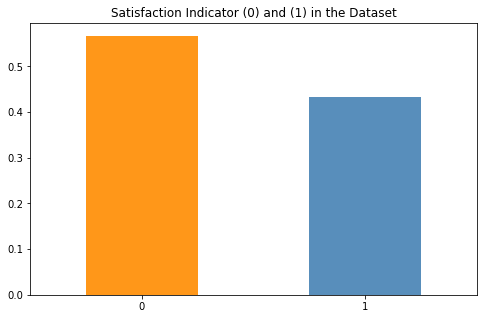

In [22]:
# Checking the nature of data set: balanced or imbalanced?
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (8,5))
data.satisfaction.value_counts(normalize = True).plot(kind='bar', color= ['darkorange','steelblue'], alpha = 0.9, rot=0)
plt.title('Satisfaction Indicator (0) and (1) in the Dataset')
plt.show()

In [23]:

IndepVar = []
for col in data.columns:
    if col != 'satisfaction':
        IndepVar.append(col)

TargetVar = 'satisfaction'

x_train =data[IndepVar]
y_train =data[TargetVar]

In [24]:

IndepVar = []
for col in data_test.columns:
    if col != 'satisfaction':
        IndepVar.append(col)

TargetVar = 'satisfaction'

x_test =data_test[IndepVar]
y_test =data_test[TargetVar]

In [25]:
cols=['Age','Class','Flight Distance','Inflight wifi service','Departure/Arrival time convenient','Ease of Online booking','Gate location','Food and drink','Online boarding','Seat comfort','Inflight entertainment','On-board service','Leg room service','Baggage handling','Checkin service','Inflight service','Cleanliness','Departure Delay in Minutes','Arrival Delay in Minutes']

In [26]:
# Scaling the features by using MinMaxScaler

from sklearn.preprocessing import MinMaxScaler

mmscaler = MinMaxScaler(feature_range=(0, 1))

x_train[cols] = mmscaler.fit_transform(x_train[cols])
x_train = pd.DataFrame(x_train)

x_test[cols] = mmscaler.fit_transform(x_test[cols])
x_test = pd.DataFrame(x_test)

In [58]:
HTResults = pd.read_csv(r"C:\Users\mouni\OneDrive\Desktop\aiml\HTResults.csv", header=0)
HTResults.head()

,Model Name,True Positive,False Negative,False Positive,True Negative,Accuracy,Precision,Recall,F1 Score,Specificity,MCC,ROC_AUC_Score,Balanced Accuracy


Model Name:  LogisticRegression()
Confusion matrix : 
 [[    0 11403]
 [    0 14573]]
Outcome values : 
 0 11403 0 14573
Classification report : 
               precision    recall  f1-score   support

           1       0.00      0.00      0.00     11403
           0       0.56      1.00      0.72     14573

    accuracy                           0.56     25976
   macro avg       0.28      0.50      0.36     25976
weighted avg       0.31      0.56      0.40     25976

Accuracy : 56.1 %
Precision : nan %
Recall : 0.0 %
F1 Score : 0.0
Specificity or True Negative Rate : 100.0 %
Balanced Accuracy : 50.0 %
MCC : nan
roc_auc_score: 0.5


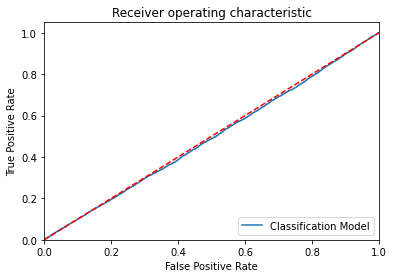

-----------------------------------------------------------------------------------------------------
Model Name:  DecisionTreeClassifier()
Confusion matrix : 
 [[10393  1010]
 [  921 13652]]
Outcome values : 
 10393 1010 921 13652
Classification report : 
               precision    recall  f1-score   support

           1       0.92      0.91      0.91     11403
           0       0.93      0.94      0.93     14573

    accuracy                           0.93     25976
   macro avg       0.92      0.92      0.92     25976
weighted avg       0.93      0.93      0.93     25976

Accuracy : 92.6 %
Precision : 91.9 %
Recall : 91.1 %
F1 Score : 0.915
Specificity or True Negative Rate : 93.7 %
Balanced Accuracy : 92.4 %
MCC : 0.849
roc_auc_score: 0.924


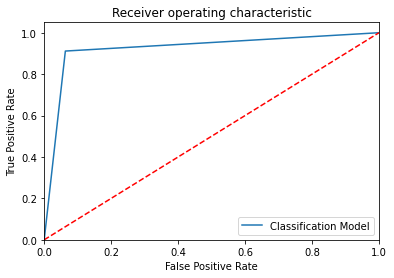

-----------------------------------------------------------------------------------------------------
Model Name:  RandomForestClassifier()
Confusion matrix : 
 [[10650   753]
 [  287 14286]]
Outcome values : 
 10650 753 287 14286
Classification report : 
               precision    recall  f1-score   support

           1       0.97      0.93      0.95     11403
           0       0.95      0.98      0.96     14573

    accuracy                           0.96     25976
   macro avg       0.96      0.96      0.96     25976
weighted avg       0.96      0.96      0.96     25976

Accuracy : 96.0 %
Precision : 97.4 %
Recall : 93.4 %
F1 Score : 0.953
Specificity or True Negative Rate : 98.0 %
Balanced Accuracy : 95.7 %
MCC : 0.919
roc_auc_score: 0.957


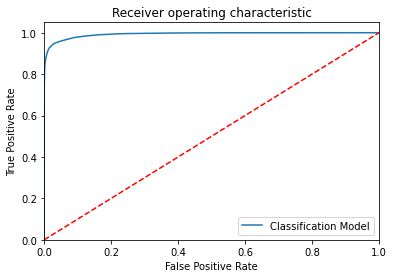

-----------------------------------------------------------------------------------------------------
Model Name:  ExtraTreesClassifier()
Confusion matrix : 
 [[10691   712]
 [  286 14287]]
Outcome values : 
 10691 712 286 14287
Classification report : 
               precision    recall  f1-score   support

           1       0.97      0.94      0.96     11403
           0       0.95      0.98      0.97     14573

    accuracy                           0.96     25976
   macro avg       0.96      0.96      0.96     25976
weighted avg       0.96      0.96      0.96     25976

Accuracy : 96.2 %
Precision : 97.4 %
Recall : 93.8 %
F1 Score : 0.955
Specificity or True Negative Rate : 98.0 %
Balanced Accuracy : 95.9 %
MCC : 0.922
roc_auc_score: 0.959


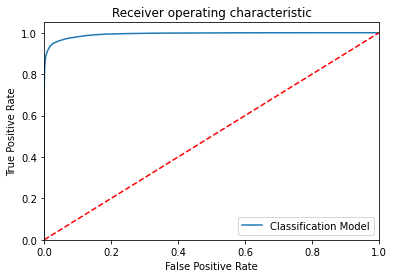

-----------------------------------------------------------------------------------------------------
Model Name:  KNeighborsClassifier()
Confusion matrix : 
 [[4593 6810]
 [5564 9009]]
Outcome values : 
 4593 6810 5564 9009
Classification report : 
               precision    recall  f1-score   support

           1       0.45      0.40      0.43     11403
           0       0.57      0.62      0.59     14573

    accuracy                           0.52     25976
   macro avg       0.51      0.51      0.51     25976
weighted avg       0.52      0.52      0.52     25976

Accuracy : 52.4 %
Precision : 45.2 %
Recall : 40.3 %
F1 Score : 0.426
Specificity or True Negative Rate : 61.8 %
Balanced Accuracy : 51.0 %
MCC : 0.021
roc_auc_score: 0.51


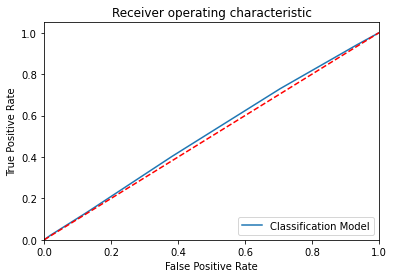

-----------------------------------------------------------------------------------------------------


In [28]:

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier


# Create objects of classification algorithm with default hyper-parameters

ModelLR = LogisticRegression()
ModelDC = DecisionTreeClassifier()
ModelRF = RandomForestClassifier()
ModelET = ExtraTreesClassifier()
ModelKNN = KNeighborsClassifier(n_neighbors=5)


# Evalution matrix for all the algorithms

MM = [ModelLR, ModelDC, ModelRF, ModelET, ModelKNN]
for models in MM:
    
    # Fit the model
    
    models.fit(x_train, y_train)
    
    # Prediction
    
    y_pred = models.predict(x_test)
    y_pred_prob = models.predict_proba(x_test)
    
    # Print the model name
    
    print('Model Name: ', models)
    
    # confusion matrix in sklearn

    from sklearn.metrics import confusion_matrix
    from sklearn.metrics import classification_report

    # actual values

    actual = y_test

    # predicted values

    predicted = y_pred

    # confusion matrix

    matrix = confusion_matrix(actual,predicted, labels=[1,0],sample_weight=None, normalize=None)
    print('Confusion matrix : \n', matrix)

    # outcome values order in sklearn

    tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
    print('Outcome values : \n', tp, fn, fp, tn)

    # classification report for precision, recall f1-score and accuracy

    C_Report = classification_report(actual,predicted,labels=[1,0])

    print('Classification report : \n', C_Report)

    # calculating the metrics

    sensitivity = round(tp/(tp+fn), 3);
    specificity = round(tn/(tn+fp), 3);
    accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
    balanced_accuracy = round((sensitivity+specificity)/2, 3);
    
    precision = round(tp/(tp+fp), 3);
    f1Score = round((2*tp/(2*tp + fp + fn)), 3);

    # Matthews Correlation Coefficient (MCC). Range of values of MCC lie between -1 to +1. 
    # A model with a score of +1 is a perfect model and -1 is a poor model

    from math import sqrt

    mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
    MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)

    print('Accuracy :', round(accuracy*100, 2),'%')
    print('Precision :', round(precision*100, 2),'%')
    print('Recall :', round(sensitivity*100,2), '%')
    print('F1 Score :', f1Score)
    print('Specificity or True Negative Rate :', round(specificity*100,2), '%'  )
    print('Balanced Accuracy :', round(balanced_accuracy*100, 2),'%')
    print('MCC :', MCC)

    # Area under ROC curve 

    from sklearn.metrics import roc_curve, roc_auc_score

    print('roc_auc_score:', round(roc_auc_score(actual, predicted), 3))
    
    # ROC Curve
    
    from sklearn.metrics import roc_auc_score
    from sklearn.metrics import roc_curve
    logit_roc_auc = roc_auc_score(actual, predicted)
    fpr, tpr, thresholds = roc_curve(actual, models.predict_proba(x_test)[:,1])
    plt.figure()
    # plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
    plt.plot(fpr, tpr, label= 'Classification Model' % logit_roc_auc)
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.savefig('Log_ROC')
    plt.show()
    print('-----------------------------------------------------------------------------------------------------')
    #----------------------------------------------------------------------------------------------------------
    new_row = {'Model Name' : models,
               'True Positive' : tp, 
               'False Negative' : fn, 
               'False Positive' : fp,
               'True Negative' : tn,
               'Accuracy' : accuracy,
               'Precision' : precision,
               'Recall' : sensitivity,
               'F1 Score' : f1Score,
               'Specificity' : specificity,
               'MCC':MCC,
               'ROC_AUC_Score':roc_auc_score(actual, predicted),
               'Balanced Accuracy':balanced_accuracy}
    HTResults = HTResults.append(new_row, ignore_index=True)

Model Name:  LogisticRegression()
Confusion matrix : 
 [[    0 11403]
 [    0 14573]]
Outcome values : 
 0 11403 0 14573
Classification report : 
               precision    recall  f1-score   support

           1       0.00      0.00      0.00     11403
           0       0.56      1.00      0.72     14573

    accuracy                           0.56     25976
   macro avg       0.28      0.50      0.36     25976
weighted avg       0.31      0.56      0.40     25976

Accuracy : 56.1 %
Precision : nan %
Recall : 0.0 %
F1 Score : 0.0
Specificity or True Negative Rate : 100.0 %
Balanced Accuracy : 50.0 %
MCC : nan
roc_auc_score: 0.5


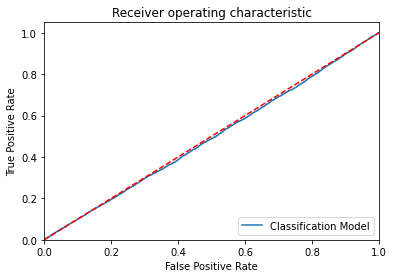

-----------------------------------------------------------------------------------------------------
Model Name:  DecisionTreeClassifier()
Confusion matrix : 
 [[10385  1018]
 [  911 13662]]
Outcome values : 
 10385 1018 911 13662
Classification report : 
               precision    recall  f1-score   support

           1       0.92      0.91      0.92     11403
           0       0.93      0.94      0.93     14573

    accuracy                           0.93     25976
   macro avg       0.93      0.92      0.92     25976
weighted avg       0.93      0.93      0.93     25976

Accuracy : 92.6 %
Precision : 91.9 %
Recall : 91.1 %
F1 Score : 0.915
Specificity or True Negative Rate : 93.7 %
Balanced Accuracy : 92.4 %
MCC : 0.849
roc_auc_score: 0.924


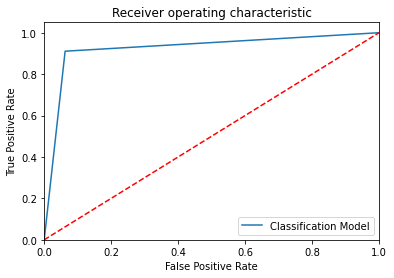

-----------------------------------------------------------------------------------------------------
Model Name:  RandomForestClassifier()
Confusion matrix : 
 [[10665   738]
 [  300 14273]]
Outcome values : 
 10665 738 300 14273
Classification report : 
               precision    recall  f1-score   support

           1       0.97      0.94      0.95     11403
           0       0.95      0.98      0.96     14573

    accuracy                           0.96     25976
   macro avg       0.96      0.96      0.96     25976
weighted avg       0.96      0.96      0.96     25976

Accuracy : 96.0 %
Precision : 97.3 %
Recall : 93.5 %
F1 Score : 0.954
Specificity or True Negative Rate : 97.9 %
Balanced Accuracy : 95.7 %
MCC : 0.919
roc_auc_score: 0.957


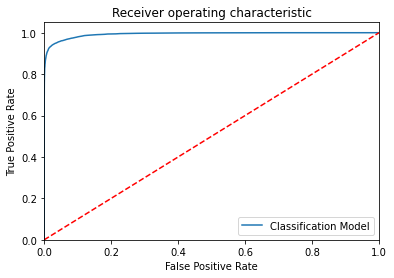

-----------------------------------------------------------------------------------------------------
Model Name:  ExtraTreesClassifier()
Confusion matrix : 
 [[10703   700]
 [  306 14267]]
Outcome values : 
 10703 700 306 14267
Classification report : 
               precision    recall  f1-score   support

           1       0.97      0.94      0.96     11403
           0       0.95      0.98      0.97     14573

    accuracy                           0.96     25976
   macro avg       0.96      0.96      0.96     25976
weighted avg       0.96      0.96      0.96     25976

Accuracy : 96.1 %
Precision : 97.2 %
Recall : 93.9 %
F1 Score : 0.955
Specificity or True Negative Rate : 97.9 %
Balanced Accuracy : 95.9 %
MCC : 0.922
roc_auc_score: 0.959


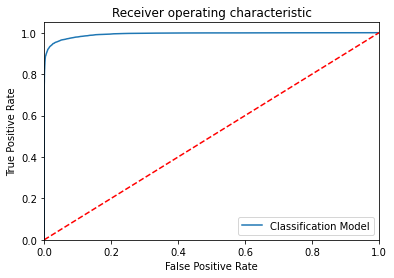

-----------------------------------------------------------------------------------------------------
Model Name:  KNeighborsClassifier()
Confusion matrix : 
 [[4593 6810]
 [5564 9009]]
Outcome values : 
 4593 6810 5564 9009
Classification report : 
               precision    recall  f1-score   support

           1       0.45      0.40      0.43     11403
           0       0.57      0.62      0.59     14573

    accuracy                           0.52     25976
   macro avg       0.51      0.51      0.51     25976
weighted avg       0.52      0.52      0.52     25976

Accuracy : 52.4 %
Precision : 45.2 %
Recall : 40.3 %
F1 Score : 0.426
Specificity or True Negative Rate : 61.8 %
Balanced Accuracy : 51.0 %
MCC : 0.021
roc_auc_score: 0.51


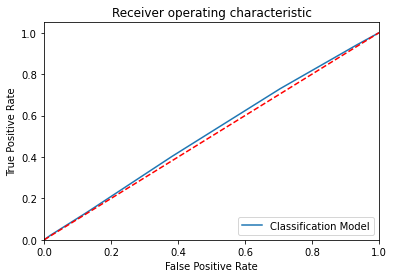

-----------------------------------------------------------------------------------------------------
Model Name:  GaussianNB()
Confusion matrix : 
 [[ 7178  4225]
 [  373 14200]]
Outcome values : 
 7178 4225 373 14200
Classification report : 
               precision    recall  f1-score   support

           1       0.95      0.63      0.76     11403
           0       0.77      0.97      0.86     14573

    accuracy                           0.82     25976
   macro avg       0.86      0.80      0.81     25976
weighted avg       0.85      0.82      0.82     25976

Accuracy : 82.3 %
Precision : 95.1 %
Recall : 62.9 %
F1 Score : 0.757
Specificity or True Negative Rate : 97.4 %
Balanced Accuracy : 80.2 %
MCC : 0.66
roc_auc_score: 0.802


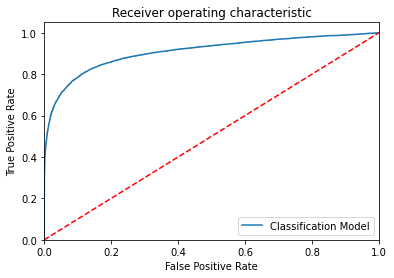

-----------------------------------------------------------------------------------------------------
Model Name:  XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric='mlogloss', gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_to_onehot=4, max_delta_step=0, max_depth=3,
              max_leaves=0, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=0,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)
Confusion matrix : 
 [[10713   690]
 [  375 14198]]
Outcome values : 
 10713 690 375 14198
Classification report : 
               precision    recall  f1-score   sup

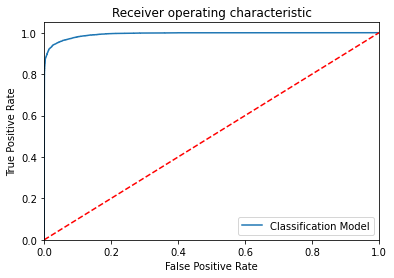

-----------------------------------------------------------------------------------------------------


In [59]:

# Build the Calssification models and compare the results

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.svm import SVC
import lightgbm as lgb

# Create objects of classification algorithm with default hyper-parameters

ModelLR = LogisticRegression()
ModelDC = DecisionTreeClassifier()
ModelRF = RandomForestClassifier()
ModelET = ExtraTreesClassifier()
ModelKNN = KNeighborsClassifier(n_neighbors=5)
ModelGNB = GaussianNB()
ModelXGB = XGBClassifier(n_estimators=100, max_depth=3, eval_metric='mlogloss')
ModelSVM = SVC(kernel='linear',random_state=1)
ModelLGB = lgb.LGBMClassifier()

# Evalution matrix for all the algorithms

#MM = [ModelLR, ModelDC, ModelRF, ModelET, ModelKNN, ModelGNB, ModelSVM, modelXGB, modelLGB]
MM = [ModelLR, ModelDC, ModelRF, ModelET, ModelKNN, ModelGNB, ModelXGB]
for models in MM:
    
    # Fit the model
    
    models.fit(x_train, y_train)
    
    # Prediction
    
    y_pred = models.predict(x_test)
    y_pred_prob = models.predict_proba(x_test)
    
    # Print the model name
    
    print('Model Name: ', models)
    
    # confusion matrix in sklearn

    from sklearn.metrics import confusion_matrix
    from sklearn.metrics import classification_report

    # actual values

    actual = y_test

    # predicted values

    predicted = y_pred

    # confusion matrix

    matrix = confusion_matrix(actual,predicted, labels=[1,0],sample_weight=None, normalize=None)
    print('Confusion matrix : \n', matrix)

    # outcome values order in sklearn

    tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
    print('Outcome values : \n', tp, fn, fp, tn)

    # classification report for precision, recall f1-score and accuracy

    C_Report = classification_report(actual,predicted,labels=[1,0])

    print('Classification report : \n', C_Report)

    # calculating the metrics

    sensitivity = round(tp/(tp+fn), 3);
    specificity = round(tn/(tn+fp), 3);
    accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
    balanced_accuracy = round((sensitivity+specificity)/2, 3);
    
    precision = round(tp/(tp+fp), 3);
    f1Score = round((2*tp/(2*tp + fp + fn)), 3);

    # Matthews Correlation Coefficient (MCC). Range of values of MCC lie between -1 to +1. 
    # A model with a score of +1 is a perfect model and -1 is a poor model

    from math import sqrt

    mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
    MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)

    print('Accuracy :', round(accuracy*100, 2),'%')
    print('Precision :', round(precision*100, 2),'%')
    print('Recall :', round(sensitivity*100,2), '%')
    print('F1 Score :', f1Score)
    print('Specificity or True Negative Rate :', round(specificity*100,2), '%'  )
    print('Balanced Accuracy :', round(balanced_accuracy*100, 2),'%')
    print('MCC :', MCC)

    # Area under ROC curve 

    from sklearn.metrics import roc_curve, roc_auc_score

    print('roc_auc_score:', round(roc_auc_score(y_test, y_pred), 3))
    
    # ROC Curve
    
    from sklearn.metrics import roc_auc_score
    from sklearn.metrics import roc_curve
    logit_roc_auc = roc_auc_score(y_test, y_pred)
    fpr, tpr, thresholds = roc_curve(y_test, models.predict_proba(x_test)[:,1])
    plt.figure()
    # plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
    plt.plot(fpr, tpr, label= 'Classification Model' % logit_roc_auc)
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.savefig('Log_ROC')
    plt.show()
    print('-----------------------------------------------------------------------------------------------------')
    #----------------------------------------------------------------------------------------------------------
    
    

    
    new_row = {'Model Name' : models,
               'True Positive' : tp, 
               'False Negative' : fn, 
               'False Positive' : fp,
               'True Negative' : tn,
               'Accuracy' : accuracy,
               'Precision' : precision,
               'Recall' : sensitivity,
               'F1 Score' : f1Score,
               'Specificity' : specificity,
               'MCC':MCC,
               'ROC_AUC_Score':roc_auc_score(y_test, y_pred),
               'Balanced Accuracy':balanced_accuracy,
              }
    HTResults = HTResults.append(new_row, ignore_index=True)

In [60]:
HTResults

,Model Name,True Positive,False Negative,False Positive,True Negative,Accuracy,Precision,Recall,F1 Score,Specificity,MCC,ROC_AUC_Score,Balanced Accuracy
0,LogisticRegression(),0,11403,0,14573,0.561,NaN,0.000,0.000,1.000,NaN,0.500000,0.500
1,DecisionTreeClassifier(),10385,1018,911,13662,0.926,0.919,0.911,0.915,0.937,0.849,0.924106,0.924
2,"(DecisionTreeClassifier(max_features='sqrt', r...",10665,738,300,14273,0.960,0.973,0.935,0.954,0.979,0.919,0.957347,0.957
3,"(ExtraTreeClassifier(random_state=361971133), ...",10703,700,306,14267,0.961,0.972,0.939,0.955,0.979,0.922,0.958807,0.959
4,KNeighborsClassifier(),4593,6810,5564,9009,0.524,0.452,0.403,0.426,0.618,0.021,0.510493,0.510
5,GaussianNB(),7178,4225,373,14200,0.823,0.951,0.629,0.757,0.974,0.660,0.801944,0.802
6,"XGBClassifier(base_score=0.5, booster='gbtree'...",10713,690,375,14198,0.959,0.966,0.939,0.953,0.974,0.917,0.956879,0.956


In [31]:
HTResults

,Model Name,True Positive,False Negative,False Positive,True Negative,Accuracy,Precision,Recall,F1 Score,Specificity,MCC,ROC_AUC_Score,Balanced Accuracy
0,LogisticRegression(),0,11403,0,14573,0.561,NaN,0.000,0.000,1.000,NaN,0.500000,0.500
1,DecisionTreeClassifier(),10393,1010,921,13652,0.926,0.919,0.911,0.915,0.937,0.849,0.924114,0.924
2,"(DecisionTreeClassifier(max_features='sqrt', r...",10650,753,287,14286,0.960,0.974,0.934,0.953,0.980,0.919,0.957135,0.957
3,"(ExtraTreeClassifier(random_state=2051249999),...",10691,712,286,14287,0.962,0.974,0.938,0.955,0.980,0.922,0.958967,0.959
4,KNeighborsClassifier(),4593,6810,5564,9009,0.524,0.452,0.403,0.426,0.618,0.021,0.510493,0.510
5,LogisticRegression(),0,11403,0,14573,0.561,NaN,0.000,0.000,1.000,NaN,0.500000,0.500
6,DecisionTreeClassifier(),10388,1015,916,13657,0.926,0.919,0.911,0.915,0.937,0.849,0.924066,0.924
7,"(DecisionTreeClassifier(max_features='sqrt', r...",10647,756,282,14291,0.960,0.974,0.934,0.954,0.981,0.919,0.957175,0.958
8,"(ExtraTreeClassifier(random_state=1230667730),...",10685,718,290,14283,0.961,0.974,0.937,0.955,0.980,0.921,0.958567,0.958
9,KNeighborsClassifier(),4593,6810,5564,9009,0.524,0.452,0.403,0.426,0.618,0.021,0.510493,0.510


In [32]:
Final_Results = pd.read_csv(r"C:\Users\mouni\OneDrive\Desktop\aiml\Final Results.csv", header=0)
Final_Results.head()

,Model Name,True_Positive,False_Negative,False_Positive,True_Negative,Accuracy,Precision,Recall,F1 Score,Specificity,MCC,ROC_AUC_Score,Balanced Accuracy


In [33]:
Final_Results

,Model Name,True_Positive,False_Negative,False_Positive,True_Negative,Accuracy,Precision,Recall,F1 Score,Specificity,MCC,ROC_AUC_Score,Balanced Accuracy


In [34]:
x_train

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
0,0,70172,1,0,0.076923,1,1.0,0.086632,0.6,0.8,0.6,0.2,1.0,0.6,1.0,1.0,0.8,0.6,0.75,0.8,1.0,1.0,0.015704,0.011364
1,1,5047,1,1,0.230769,0,0.0,0.041195,0.6,0.4,0.6,0.6,0.2,0.6,0.2,0.2,0.2,1.0,0.50,0.2,0.8,0.2,0.000628,0.003788
2,2,110028,0,0,0.243590,0,0.0,0.224354,0.4,0.4,0.4,0.4,1.0,1.0,1.0,1.0,0.8,0.6,0.75,0.8,0.8,1.0,0.000000,0.000000
3,3,24026,0,0,0.230769,0,0.0,0.107229,0.4,1.0,1.0,1.0,0.4,0.4,0.4,0.4,0.4,1.0,0.50,0.2,0.8,0.4,0.006910,0.005682
4,4,119299,1,0,0.692308,0,0.0,0.036955,0.6,0.6,0.6,0.6,0.8,1.0,1.0,0.6,0.6,0.8,0.75,0.6,0.6,0.6,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,103899,94171,0,1,0.205128,0,0.5,0.032512,0.4,0.2,0.4,0.6,0.4,0.4,0.4,0.4,0.6,0.2,0.75,0.4,0.6,0.4,0.001884,0.000000
103900,103900,73097,1,0,0.538462,0,0.0,0.467690,0.8,0.8,0.8,0.8,0.4,0.8,1.0,1.0,1.0,1.0,1.00,1.0,1.0,0.8,0.000000,0.000000
103901,103901,68825,1,1,0.294872,0,0.0,0.396607,0.2,0.2,0.2,0.6,0.8,0.2,1.0,0.8,0.6,0.4,0.75,1.0,1.0,0.8,0.004397,0.008838
103902,103902,54173,0,1,0.192308,0,0.5,0.195679,0.2,0.2,0.2,1.0,0.2,0.2,0.2,0.2,0.8,1.0,0.00,1.0,0.8,0.2,0.000000,0.000000


In [35]:

y_train

0         0
1         0
2         1
3         0
4         1
         ..
103899    0
103900    1
103901    0
103902    0
103903    0
Name: satisfaction, Length: 103904, dtype: int32

In [36]:
x_test

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
0,0,19556,0,0,0.576923,0,0.5,0.026050,1.0,0.8,0.6,0.75,0.6,0.8,0.50,1.0,1.0,1.0,1.00,0.25,1.0,1.0,0.044326,0.039462
1,1,90035,0,0,0.371795,0,0.0,0.571890,0.2,0.2,0.6,0.00,1.0,0.8,1.00,0.8,0.8,0.8,0.75,0.50,0.8,1.0,0.000000,0.000000
2,2,12360,1,1,0.166667,0,0.5,0.032512,0.4,0.0,0.4,0.75,0.4,0.4,0.25,0.4,0.8,0.2,0.50,0.25,0.4,0.4,0.000000,0.000000
3,3,77959,1,0,0.474359,0,0.0,0.675687,0.0,0.0,0.0,0.25,0.6,0.8,0.75,0.2,0.2,0.2,0.00,0.50,0.2,0.8,0.000000,0.005381
4,4,36875,0,0,0.538462,0,0.5,0.232431,0.4,0.6,0.8,0.50,0.8,0.2,0.25,0.4,0.4,0.4,0.25,0.75,0.4,0.8,0.000000,0.017937
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25971,25971,78463,1,1,0.346154,0,0.0,0.099960,0.6,0.6,0.6,0.00,0.8,0.6,0.75,0.8,0.6,0.4,0.75,0.75,1.0,0.8,0.000000,0.000000
25972,25972,71167,1,0,0.205128,0,0.0,0.124192,0.8,0.8,0.8,0.75,0.8,0.8,0.75,0.8,0.8,1.0,1.00,1.00,1.0,0.8,0.000000,0.000000
25973,25973,37675,0,0,0.128205,1,0.5,0.160945,0.4,1.0,0.2,1.00,0.4,0.2,0.25,0.4,0.8,0.6,0.75,1.00,0.8,0.4,0.000000,0.000000
25974,25974,90086,1,0,0.089744,0,0.0,0.221325,0.6,0.6,0.6,0.50,0.8,0.8,0.75,0.8,0.6,0.4,1.00,0.75,1.0,0.8,0.000000,0.000000


In [37]:
y_test

0        1
1        1
2        0
3        1
4        1
        ..
25971    0
25972    1
25973    0
25974    1
25975    0
Name: satisfaction, Length: 25976, dtype: int32

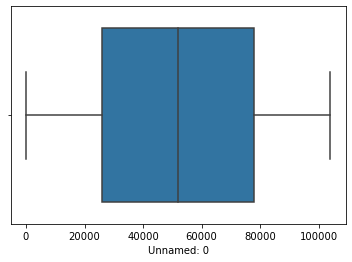

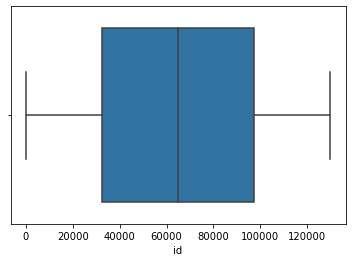

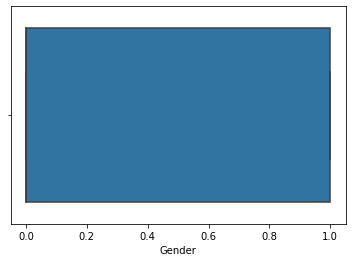

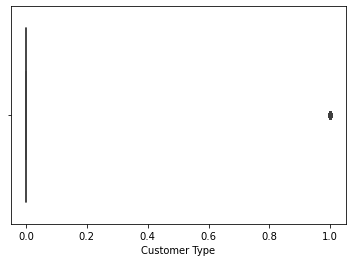

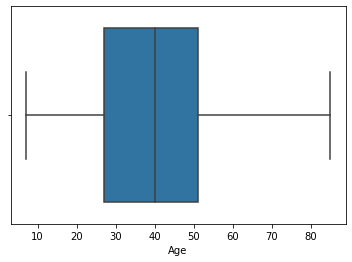

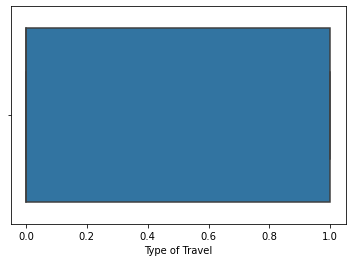

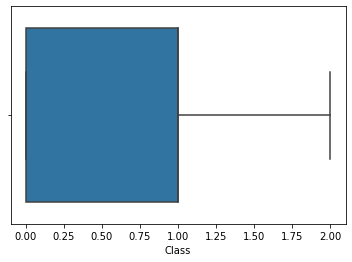

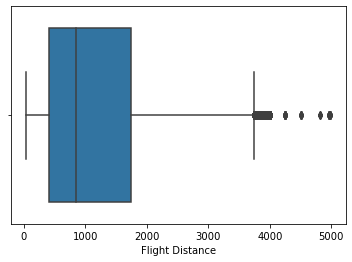

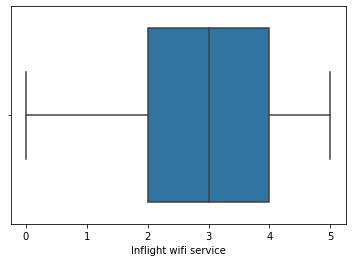

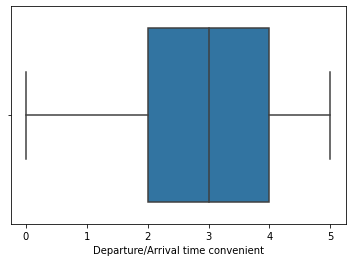

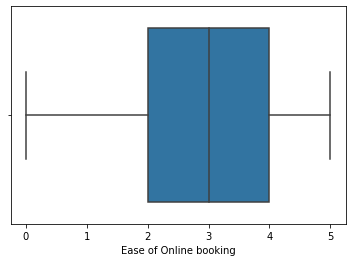

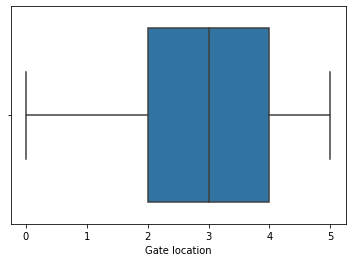

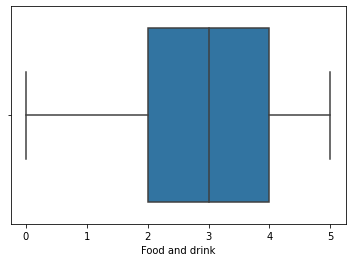

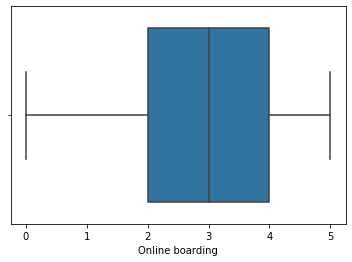

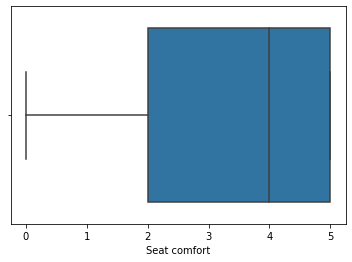

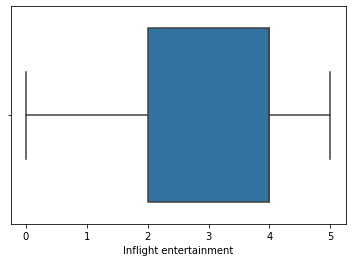

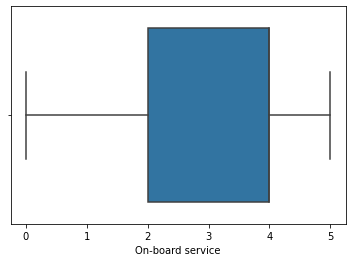

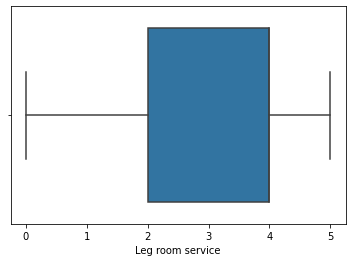

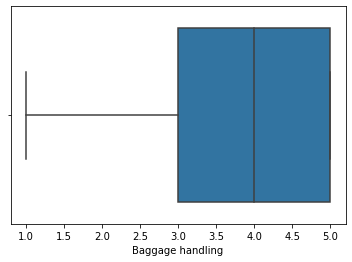

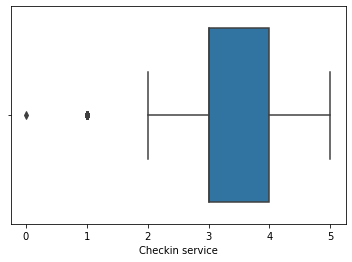

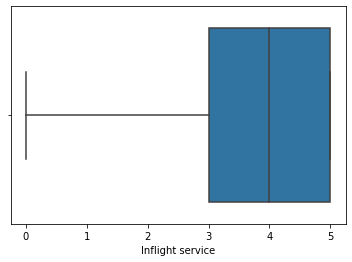

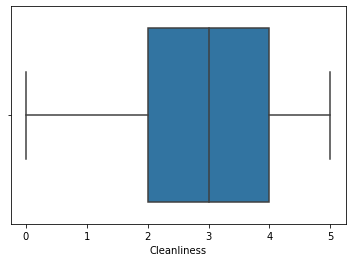

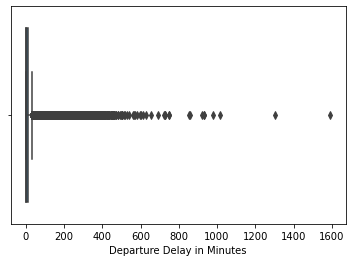

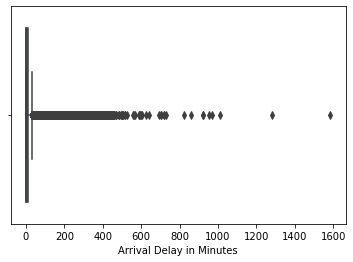

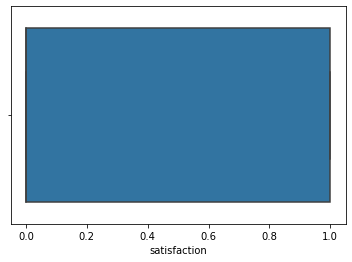

In [38]:
# Display the box plot to show the outliers
import seaborn as sns
for x in data.columns:
    sns.boxplot(x=data[x])
    plt.show()

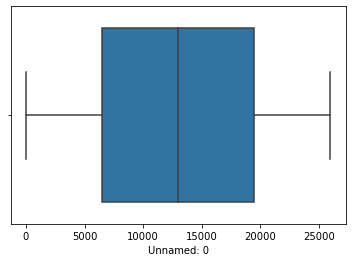

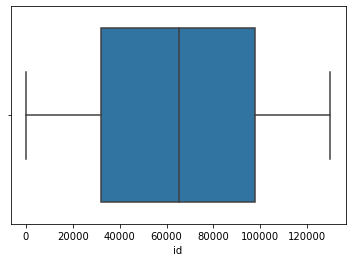

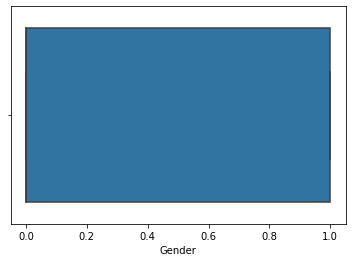

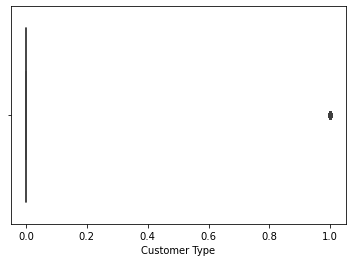

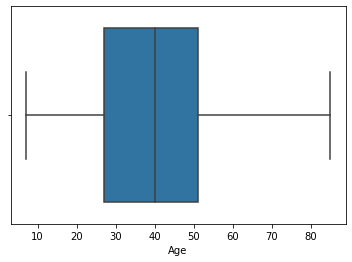

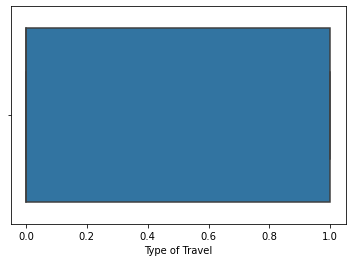

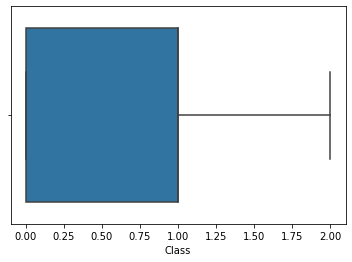

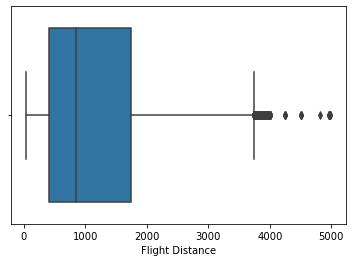

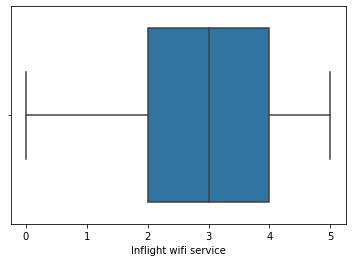

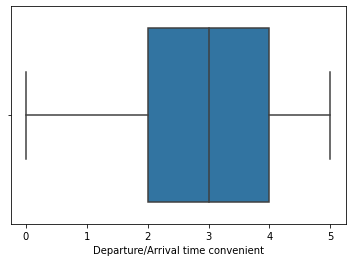

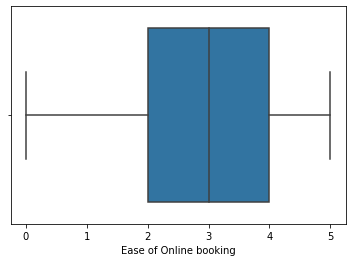

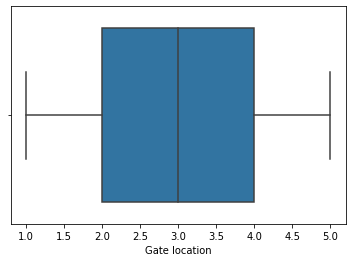

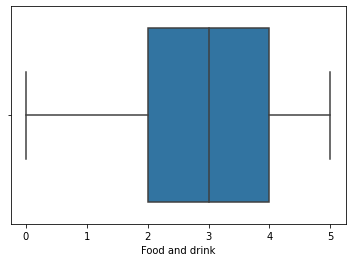

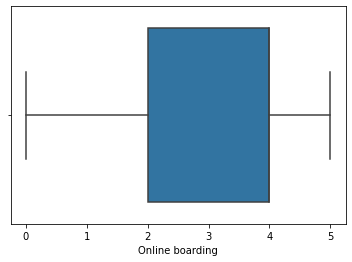

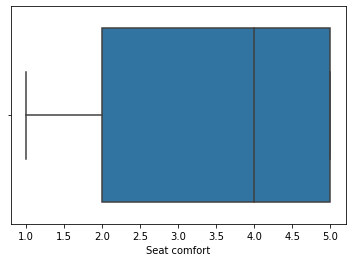

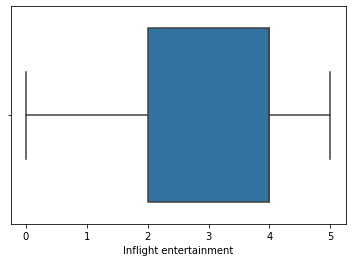

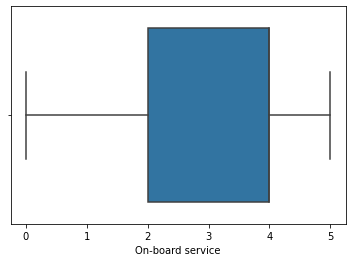

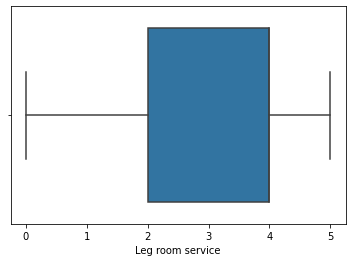

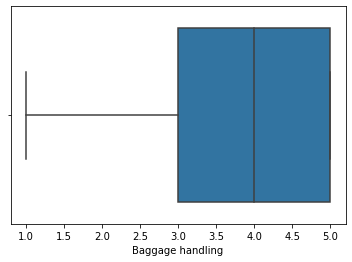

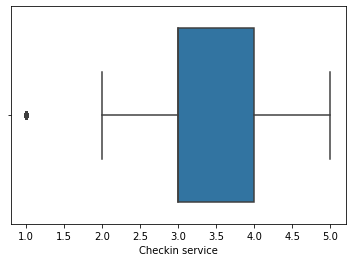

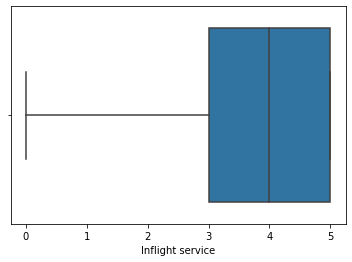

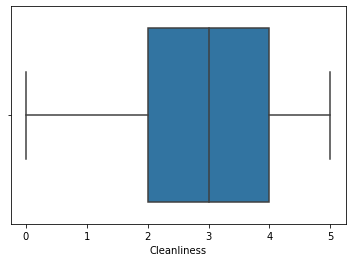

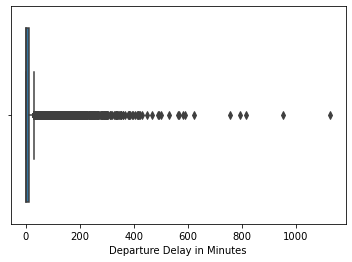

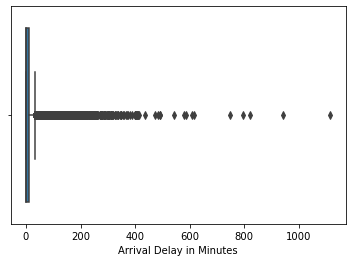

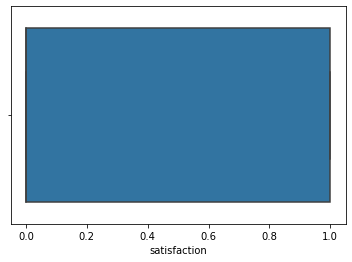

In [39]:
# Display the box plot to show the outliers
import seaborn as sns
for x in data_test.columns:
    sns.boxplot(x=data_test[x])
    plt.show()

In [40]:
#Eliminate the outlier in 'Customer Type' and write data to new file

am_UL = round(data['Customer Type'].mean() + 3 * data['Customer Type'].std(),3)
am_LL = round(data['Customer Type'].mean() - 3 * data['Customer Type'].std(),3)
data_bk= data[(data['Customer Type'] > am_LL) & (data['Customer Type'] < am_UL)]
data_bk.shape

(103904, 25)

In [41]:
#Eliminate the outlier in 'Flight Distance' and write data to new file

am_UL = round(data['Flight Distance'].mean() + 3 * data['Flight Distance'].std(),3)
am_LL = round(data['Flight Distance'].mean() - 3 * data['Flight Distance'].std(),3)
data_bk= data[(data['Flight Distance'] > am_LL) & (data['Flight Distance'] < am_UL)]
data_bk.shape

(103846, 25)

In [42]:
#Eliminate the outlier in 'Arrival Delay in Minutes' and write data to new file

am_UL = round(data['Arrival Delay in Minutes'].mean() + 3 * data['Arrival Delay in Minutes'].std(),3)
am_LL = round(data['Arrival Delay in Minutes'].mean() - 3 * data['Arrival Delay in Minutes'].std(),3)
data_bk= data[(data['Arrival Delay in Minutes'] > am_LL) & (data['Arrival Delay in Minutes'] < am_UL)]
data_bk.shape

(101679, 25)

In [43]:
#Eliminate the outlier in 'Departure Delay in Minutes' and write data to new file

am_UL = round(data['Departure Delay in Minutes'].mean() + 3 * data['Departure Delay in Minutes'].std(),3)
am_LL = round(data['Departure Delay in Minutes'].mean() - 3 * data['Departure Delay in Minutes'].std(),3)
data_bk= data[(data['Departure Delay in Minutes'] > am_LL) & (data['Departure Delay in Minutes'] < am_UL)]
data_bk.shape

(101682, 25)

In [48]:
#hyper tuning for random forest

In [49]:
# Hyperparameter tuning by GridSearchCV

from sklearn.model_selection import GridSearchCV

# Create the parameter grid based on the results of random search 
GS_grid = {
    'bootstrap': [True, False],
    'max_depth': [10,15],
    'max_features': ['auto', 'sqrt', 'log2'],
    'min_samples_leaf': [3, 4, 5, 6],
    'min_samples_split': [3,4,5,6],
    'n_estimators': [100, 200, 300, 400, 500]
}

# Create object for model

ModelRF2 = RandomForestClassifier()

# Instantiate the grid search model

Grid_search = GridSearchCV(estimator = ModelRF2, param_grid = {'n_estimators': [100, 200, 300, 400, 500]
}, cv = 3, n_jobs = -1, verbose = 2)

# Fit the grid search to the data

Grid_search.fit(x_train,y_train)

Fitting 3 folds for each of 5 candidates, totalling 15 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'n_estimators': [100, 200, 300, 400, 500]}, verbose=2)

In [50]:
# Best parameter from gridseachCV

print(Grid_search.best_params_)


{'n_estimators': 500}


In [51]:
# Display of best parameter

best_grid = Grid_search.best_estimator_
best_grid

RandomForestClassifier(n_estimators=500)

Confusion matrix : 
 [[10680   723]
 [  295 14278]]
Outcome values : 
 10680 723 295 14278
Classification report : 
               precision    recall  f1-score   support

           1       0.97      0.94      0.95     11403
           0       0.95      0.98      0.97     14573

    accuracy                           0.96     25976
   macro avg       0.96      0.96      0.96     25976
weighted avg       0.96      0.96      0.96     25976

Accuracy : 96.1 %
Precision : 97.3 %
Recall : 93.7 %
F1 Score : 0.955
Specificity or True Negative Rate : 98.0 %
Balanced Accuracy : 95.8 %
MCC : 0.921
roc_auc_score: 0.958


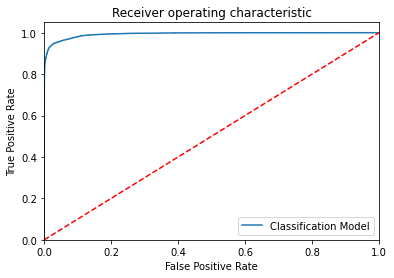

-----------------------------------------------------------------------------------------------------


In [52]:
# To build the 'RandomForestClassifier' model with random sampling with Hyperparametr tuning with RandomizedSearchCV

from sklearn.ensemble import RandomForestClassifier

ModelRF5 = RandomForestClassifier(n_estimators=2000, criterion='gini', max_depth=120, min_samples_split=10,
                                  min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='auto', 
                                  max_leaf_nodes=None, min_impurity_decrease=0.0, bootstrap=True, oob_score=False, 
                                  n_jobs=None, random_state=None, verbose=0, warm_start=False, class_weight=None, 
                                  ccp_alpha=0.0, max_samples=None)

# Train the model with train data 

ModelRF5.fit(x_train,y_train)

# Predict the model with test data set

y_pred = ModelRF5.predict(x_test)
y_pred_prob = ModelRF5.predict_proba(x_test)

# Confusion matrix in sklearn

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# actual values

actual = y_test

# predicted values

predicted = y_pred

# confusion matrix

matrix = confusion_matrix(actual,predicted, labels=[1,0],sample_weight=None, normalize=None)
print('Confusion matrix : \n', matrix)

# outcome values order in sklearn

tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
print('Outcome values : \n', tp, fn, fp, tn)

# classification report for precision, recall f1-score and accuracy

C_Report = classification_report(actual,predicted,labels=[1,0])

print('Classification report : \n', C_Report)

# calculating the metrics

sensitivity = round(tp/(tp+fn), 3);
specificity = round(tn/(tn+fp), 3);
accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
balanced_accuracy = round((sensitivity+specificity)/2, 3);
precision = round(tp/(tp+fp), 3);
f1Score = round((2*tp/(2*tp + fp + fn)), 3);

# Matthews Correlation Coefficient (MCC). Range of values of MCC lie between -1 to +1. 
# A model with a score of +1 is a perfect model and -1 is a poor model

from math import sqrt

mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)

print('Accuracy :', round(accuracy*100, 2),'%')
print('Precision :', round(precision*100, 2),'%')
print('Recall :', round(sensitivity*100,2), '%')
print('F1 Score :', f1Score)
print('Specificity or True Negative Rate :', round(specificity*100,2), '%'  )
print('Balanced Accuracy :', round(balanced_accuracy*100, 2),'%')
print('MCC :', MCC)

# Area under ROC curve 

from sklearn.metrics import roc_curve, roc_auc_score

print('roc_auc_score:', round(roc_auc_score(actual, predicted), 3))

# ROC Curve

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(actual, predicted)
fpr, tpr, thresholds = roc_curve(actual, ModelRF5.predict_proba(x_test)[:,1])
plt.figure()
# plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot(fpr, tpr, label= 'Classification Model' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show() 
print('-----------------------------------------------------------------------------------------------------')
#----------------------------------------------------------------------------------------------------------
new_row = {'Model Name' : ModelRF5,
           'True_Positive': tp,
           'False_Negative': fn, 
           'False_Positive': fp, 
           'True_Negative': tn,
           'Accuracy' : accuracy,
           'Precision' : precision,
           'Recall' : sensitivity,
           'F1 Score' : f1Score,
           'Specificity' : specificity,
           'MCC':MCC,
           'ROC_AUC_Score':roc_auc_score(actual, predicted),
           'Balanced Accuracy':balanced_accuracy}
HTResults = HTResults.append(new_row, ignore_index=True)
#----------------------------------------------------------------------------------------------------------

In [53]:
#hyper tuning for decision tree

In [54]:
from sklearn.model_selection import GridSearchCV

# Create the parameter grid based on the results of random search 

Grid_Params = {'max_depth': [2, 3, 5, 10, 20],
               'min_samples_leaf': [5, 10, 20, 50, 100],
               'criterion': ["gini", "entropy"]
               }

ModelDT = DecisionTreeClassifier(random_state=42)

# Instantiate the grid search model

Grid_search = GridSearchCV(estimator=ModelDT, param_grid=Grid_Params, cv=3, n_jobs=-1, verbose=2)

# Fit the grid search to the data

Grid_search.fit(x_train,y_train)

Fitting 3 folds for each of 50 candidates, totalling 150 fits


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100]},
             verbose=2)

In [55]:
# Best parameter from gridseachCV

Grid_search.best_params_

{'criterion': 'entropy', 'max_depth': 20, 'min_samples_leaf': 20}

In [56]:
# Display of best parameter

best_grid = Grid_search.best_estimator_
best_grid

DecisionTreeClassifier(criterion='entropy', max_depth=20, min_samples_leaf=20,
                       random_state=42)

In [57]:
# To build the 'Decision Tree' model Random sampling - Hyperparameter tuning with RandomizedSearchCV  

from sklearn.tree import DecisionTreeClassifier 

ModelDT = DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini', max_depth=560, max_features='log2',
                                 max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None,
                                 min_samples_leaf=6, min_samples_split=5,min_weight_fraction_leaf=0.0,
                                 random_state=None, splitter='best')

# Train the model with train data 

ModelDT.fit(x_train,y_train)

# Predict the model with test data set

y_pred = ModelDT.predict(x_test)
y_pred_prob = ModelDT.predict_proba(x_test)

# Confusion matrix in sklearn

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# actual values

actual = y_test

# predicted values

predicted = y_pred

# confusion matrix

matrix = confusion_matrix(actual,predicted, labels=[1,0],sample_weight=None, normalize=None)
print('Confusion matrix : \n', matrix)

# outcome values order in sklearn

tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
print('Outcome values : \n', tp, fn, fp, tn)

# classification report for precision, recall f1-score and accuracy

C_Report = classification_report(actual,predicted,labels=[1,0])

print('Classification report : \n', C_Report)

# calculating the metrics

sensitivity = round(tp/(tp+fn), 3);
specificity = round(tn/(tn+fp), 3);
accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
balanced_accuracy = round((sensitivity+specificity)/2, 3);
precision = round(tp/(tp+fp), 3);
f1Score = round((2*tp/(2*tp + fp + fn)), 3);

# Matthews Correlation Coefficient (MCC). Range of values of MCC lie between -1 to +1. 
# A model with a score of +1 is a perfect model and -1 is a poor model

from math import sqrt

mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)

print('Accuracy :', round(accuracy*100, 2),'%')
print('Precision :', round(precision*100, 2),'%')
print('Recall :', round(sensitivity*100,2), '%')
print('F1 Score :', f1Score)
print('Specificity or True Negative Rate :', round(specificity*100,2), '%'  )
print('Balanced Accuracy :', round(balanced_accuracy*100, 2),'%')
print('MCC :', MCC)

# Area under ROC curve 

from sklearn.metrics import roc_curve, roc_auc_score

print('roc_auc_score:', round(roc_auc_score(y_test, y_pred), 3))

# ROC Curve

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, y_pred)
fpr, tpr, thresholds = roc_curve(y_test,ModelDT.predict_proba(x_test)[:,1])
plt.figure()
# plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot(fpr, tpr, label= 'Classification Model' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show() 
print('-----------------------------------------------------------------------------------------------------')
#----------------------------------------------------------------------------------------------------------
new_row = {'Model Name' : ModelDT,
           'True_Positive': tp,
           'False_Negative': fn, 
           'False_Positive': fp, 
           'True_Negative': tn,
           'Accuracy' : accuracy,
           'Precision' : precision,
           'Recall' : sensitivity,
           'F1 Score' : f1Score,
           'Specificity' : specificity,
           'MCC':MCC,
           'ROC_AUC_Score':roc_auc_score(y_test, y_pred),
           'Balanced Accuracy':balanced_accuracy}
HTResults = HTResults.append(new_row, ignore_index=True)
#----------------------------------------------------------------------------------------------------------

TypeError: __init__() got an unexpected keyword argument 'min_impurity_split'

In [ ]:
#hyper tuning for extra trees

In [ ]:
# Hyperparameter tuning by GridSearchCV

from sklearn.model_selection import GridSearchCV

# Create the parameter grid based on the results of random search 

GS_grid = {'bootstrap': [True, False],
           'max_depth': [10,15],
           'max_features': [2, 3],
           'min_samples_leaf': [3, 4, 5,6],
           'min_samples_split': [3,4,5,6],
           'n_estimators': [1150, 1200, 1250, 1300,1350],
           'criterion':['entropy','gini']
           }

# Create object for model

ModelET = ExtraTreesClassifier()

# Instantiate the grid search model

Grid_search = GridSearchCV(estimator = ModelET, param_grid = GS_grid, cv = 3, n_jobs = -1, verbose = 2)

# Fit the grid search to the data

Grid_search.fit(x_train,y_train)

In [ ]:
# Best parameter from gridseachCV

Grid_search.best_params_